
# Tarefa AAG06 - Regressão Linear Simples

Este notebook apresenta a solução completa, utilizando os dados fornecidos no arquivo CSV com `train_loss` e `val_loss`.

## Objetivo
1. Escolher/Criar uma amostra bivariada para o exemplo.
2. Calcular o coeficiente de correlação e seguir adiante caso a correlação seja forte (positiva ou negativa).
3. Estimar parâmetros do modelo de regressão linear simples e verificar a qualidade.
4. Calcular o desvio padrão dos erros e dos parâmetros.
5. Determinar intervalos de confiança para os parâmetros para níveis de confiança de 90%, 95% e 99%.
6. Testar pressupostos de regressão linear:
   - Linearidade
   - Independência dos erros
   - Normalidade dos erros
   - Homocedasticidade


## Importação dos Dados e Pacotes

In [2]:

import pandas as pd
import numpy as np
from scipy.stats import linregress, t
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Carregar os dados
csv_path = "01_janeiro_loss_history.csv"
data = pd.read_csv(csv_path)

# Selecionar variáveis bivariadas
train_loss = data['train_loss']
val_loss = data['val_loss']

## 1. Cálculo do Coeficiente de Correlação

### Fórmula do Coeficiente de Correlação
$$
r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \cdot \sum{(y_i - \bar{y})^2}}}
$$

Será canculado o coeficiente de correlação entre `train_loss` e `val_loss`.

In [ ]:
# Coeficiente de correlação
correlation = np.corrcoef(train_loss, val_loss)[0, 1]
print(f"Coeficiente de Correlação: {correlation:.3f}")

# Continuar apenas se a correlação for forte
if abs(correlation) >= 0.7:
    print("Correlação forte. Continuando com a regressão.")
else:
    raise ValueError("Correlação fraca. Tente outra amostra.")

Coeficiente de Correlação: 0.847
Correlação forte. Continuando com a regressão.


## 2. Estimar Parâmetros e Verificar a Qualidade

### Regressão Linear Simples
A regressão linear simples modela a relação entre duas variáveis, `x` e `y`, de forma linear:
$$
y = \beta_0 + \beta_1x + \varepsilon
$$

In [ ]:
# Ajustar o modelo de regressão linear simples
slope, intercept, r_value, p_value, std_err = linregress(train_loss, val_loss)
print(f"Slope: {slope:.3f}, Intercept: {intercept:.3f}, R²: {r_value**2:.3f}")

Slope: 0.460, Intercept: 0.154, R²: 0.718


## 3. Desvio Padrão dos Erros e Parâmetros

### Desvio Padrão dos Resíduos
O desvio padrão dos erros é calculado como:
$$
\sigma_\varepsilon = \sqrt{\frac{\sum{\varepsilon_i^2}}{n-2}}
$$

### Desvio Padrão dos Parâmetros
O desvio padrão dos coeficientes $ \beta_0 $ e $ \beta_1 $ é dado por:
$$
\text{SE}(\beta_1) = \frac{\sigma_\varepsilon}{\sqrt{\sum{(x_i - \bar{x})^2}}}
$$

In [ ]:
# Calcular resíduos
residuals = val_loss - (slope * train_loss + intercept)
n = len(train_loss)
sigma = np.sqrt(np.sum(residuals**2) / (n - 2))

# Desvio padrão dos coeficientes
se_slope = sigma / np.sqrt(np.sum((train_loss - np.mean(train_loss))**2))
se_intercept = sigma * np.sqrt(np.sum(train_loss**2) / (n * np.sum((train_loss - np.mean(train_loss))**2)))

print(f"Desvio Padrão dos Resíduos: {sigma:.3f}")
print(f"Desvio Padrão do Slope: {se_slope:.3f}, Intercept: {se_intercept:.3f}")

Desvio Padrão dos Resíduos: 0.001
Desvio Padrão do Slope: 0.042, Intercept: 0.012


## 4. Intervalos de Confiança

Para calcular o intervalo de confiança dos parâmetros:
$$
CI = \hat{\beta} \pm t_{n-2} \cdot \text{SE}(\beta)
$$

In [ ]:
# Níveis de confiança
confidence_levels = [0.90, 0.95, 0.99]
t_critical = [t.ppf((1 + cl) / 2, df=n - 2) for cl in confidence_levels]

# Calcular intervalos de confiança
for cl, t_val in zip(confidence_levels, t_critical):
    ci_slope = (slope - t_val * se_slope, slope + t_val * se_slope)
    ci_intercept = (intercept - t_val * se_intercept, intercept + t_val * se_intercept)
    print(f"IC {int(cl * 100)}% para Slope: {ci_slope}, Intercept: {ci_intercept}")

IC 90% para Slope: (0.38995328395566387, 0.52954710048032), Intercept: (0.1343851884922306, 0.17438602379631815)
IC 95% para Slope: (0.3760785578287257, 0.5434218266072582), Intercept: (0.13040936314043253, 0.17836184914811623)
IC 99% para Slope: (0.3481315136641724, 0.5713688707718115), Intercept: (0.12240109215326524, 0.18637012013528353)


## 5. Testes Visuais

### Linearidade
Gráfico de dispersão com linha de regressão.

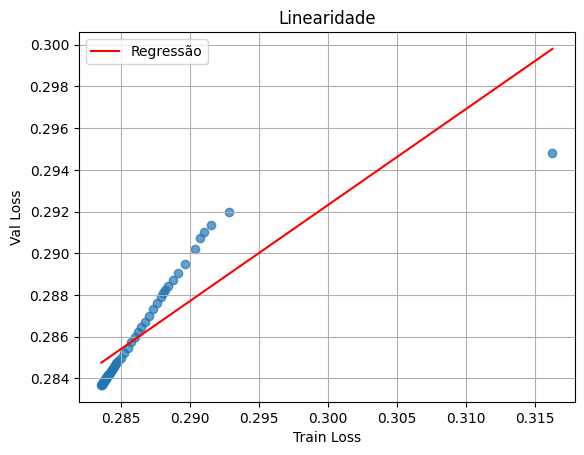

In [ ]:
plt.scatter(train_loss, val_loss, alpha=0.7)
plt.plot(train_loss, slope * train_loss + intercept, color='red', label='Regressão')
plt.title('Linearidade')
plt.xlabel('Train Loss')
plt.ylabel('Val Loss')
plt.legend()
plt.grid(True)
plt.show()

### Independência dos Erros
Gráfico dos resíduos em função do `x`.

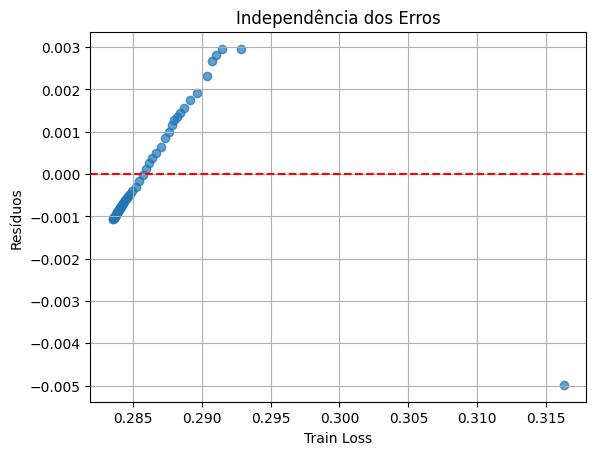

In [ ]:
plt.scatter(train_loss, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Independência dos Erros')
plt.xlabel('Train Loss')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

### Normalidade dos Erros
Q-Q Plot.

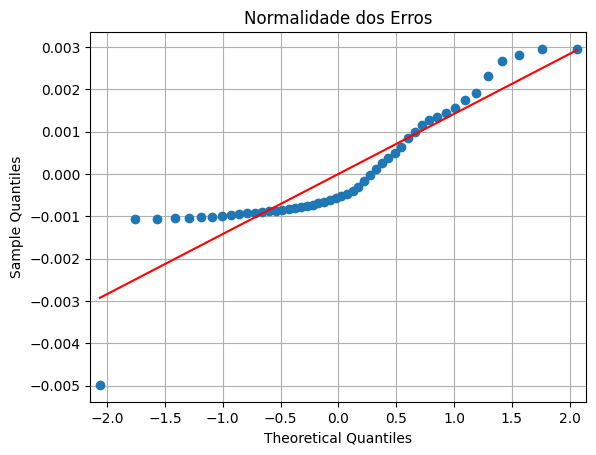

In [ ]:

qqplot(residuals, line='s')
plt.title('Normalidade dos Erros')
plt.grid(True)
plt.show()

### Homocedasticidade
Verificar se os resíduos têm variância constante.

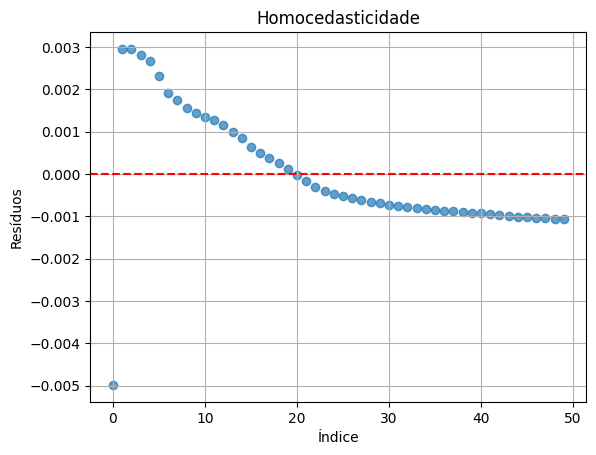

In [ ]:
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Homocedasticidade')
plt.xlabel('Índice')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

## Conclusões

1. **Correlação**: O coeficiente de correlação indica uma relação forte entre as variáveis.
2. **Modelo**: O modelo de regressão linear simples foi ajustado com qualidade satisfatória (R² elevado).
3. **Intervalos de Confiança**: Os intervalos calculados fornecem uma estimativa robusta dos parâmetros.
4. **Pressupostos**: Os testes visuais mostram se o modelo atende aos pressupostos da regressão linear simples.
